In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


## Splitting & Using XGB


In [5]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

xgb_classifier = xgb.XGBClassifier()

start_time = time.time()
xgb_classifier.fit(X_train, y_train_encoded)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

y_pred_encoded = xgb_classifier.predict(X_test)

y_pred = le.inverse_transform(y_pred_encoded)


Training time: 0.07963132858276367 seconds


## Using Evaluation Metrics

Accuracy =  94.66666666666667 %
Precision =  0.9474548440065681
Recall =  0.9438914027149321
F1-score =  0.9454941860465116


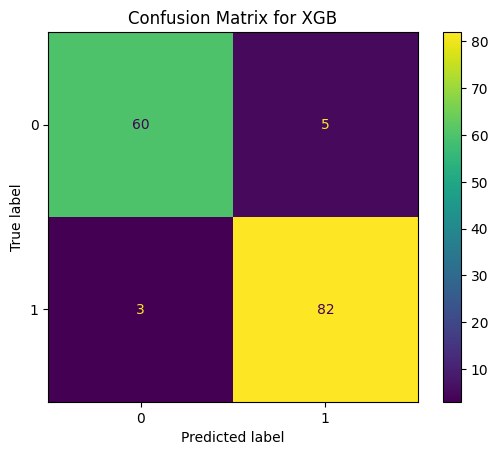

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.94      0.96      0.95        85

    accuracy                           0.95       150
   macro avg       0.95      0.94      0.95       150
weighted avg       0.95      0.95      0.95       150



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for XGB')
plt.show()

print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

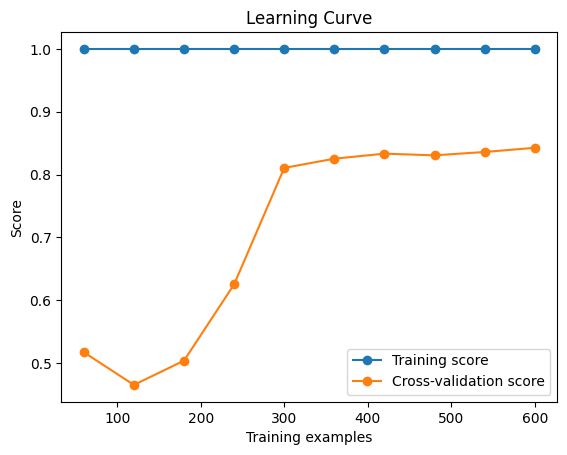

In [7]:
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (XGBoost) ---
Training Wall Time: 0.0794 seconds
Training CPU Time (User): 0.2344 seconds
Training CPU Time (System): 0.3594 seconds
Memory RSS after training: 201.25 MB

--- Model Prediction (XGBoost) ---
Prediction Wall Time (for 150 samples): 0.0000 seconds
Prediction CPU Time (User): 0.0000 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (XGBoost) ---
Accuracy = 94.67 %
Precision (Macro) = 0.9475
Recall (Macro) = 0.9439
F1-score (Macro) = 0.9455

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.94      0.96      0.95        85

    accuracy                           0.95       150
   macro avg       0.95      0.94      0.95       150
weighted avg       0.95      0.95      0.95       150


--- Model Complexity (XGBoost) ---
Number of Features Seen: 70
Number of Actual Estimators (Trees Built): 100
Could not parse XGBoost model dump fo

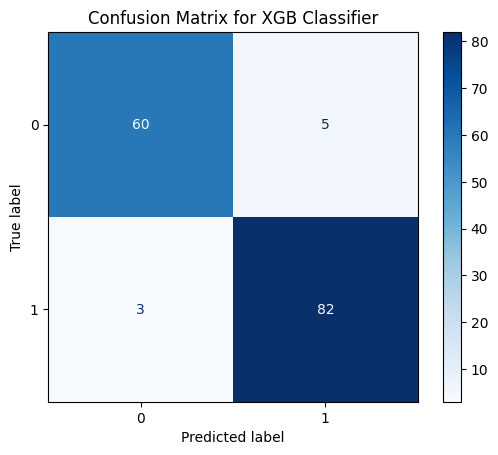


Displaying Learning Curve...


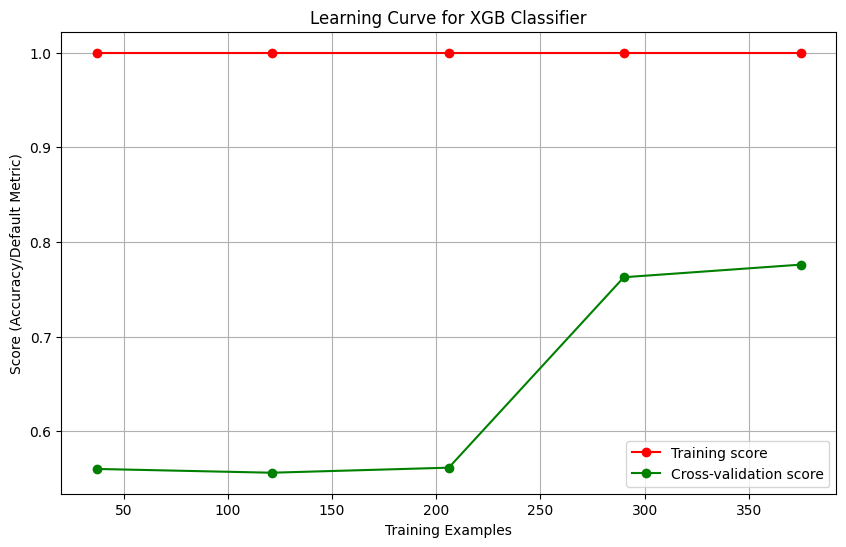


Displaying Feature Importances...


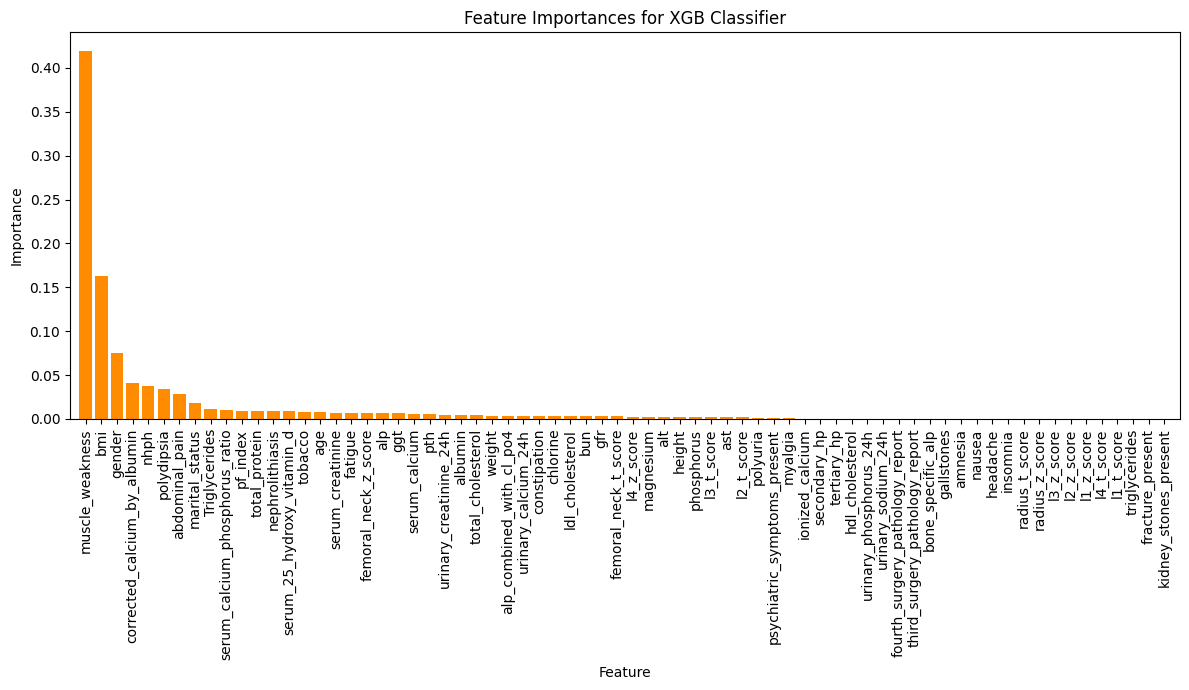


Displaying Histogram of Individual Tree Depths (XGB)...
Individual tree depths data processed but list might be empty or not calculated if parsing failed.

--- Generating Visualizations for Collected Metrics (XGBoost) ---


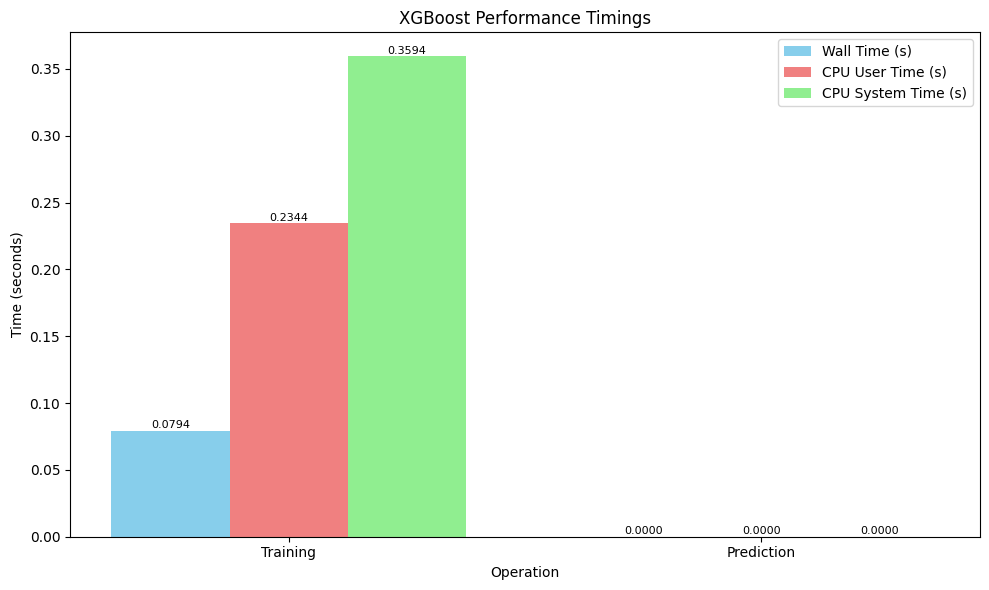

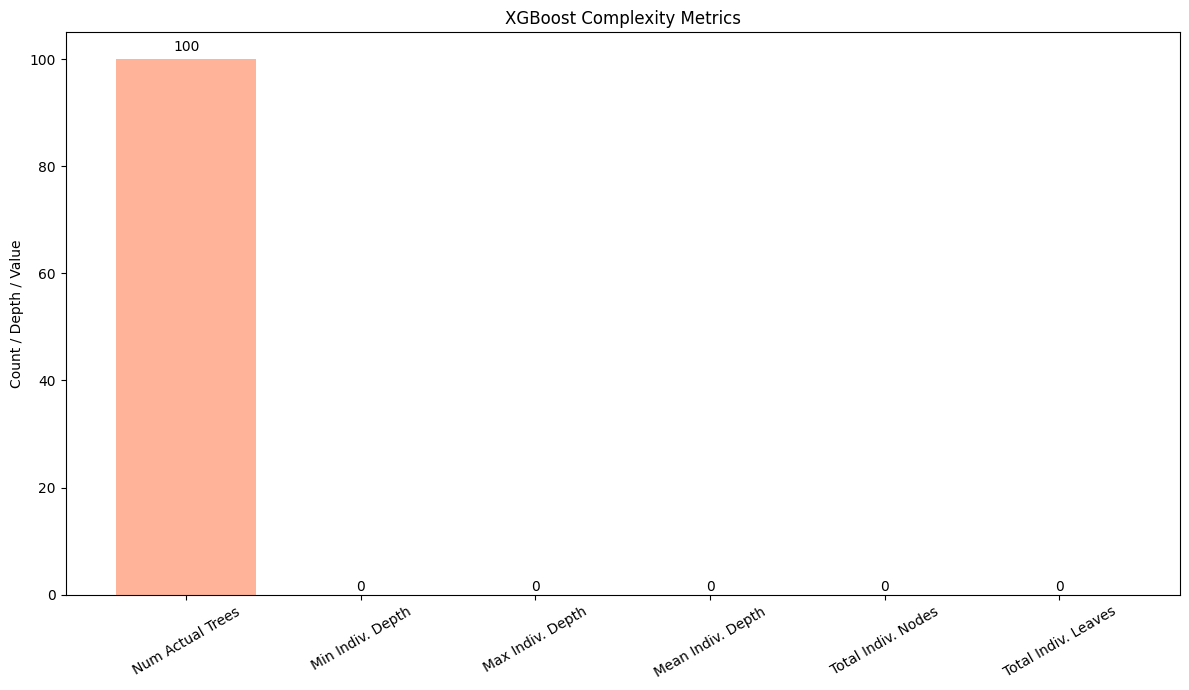

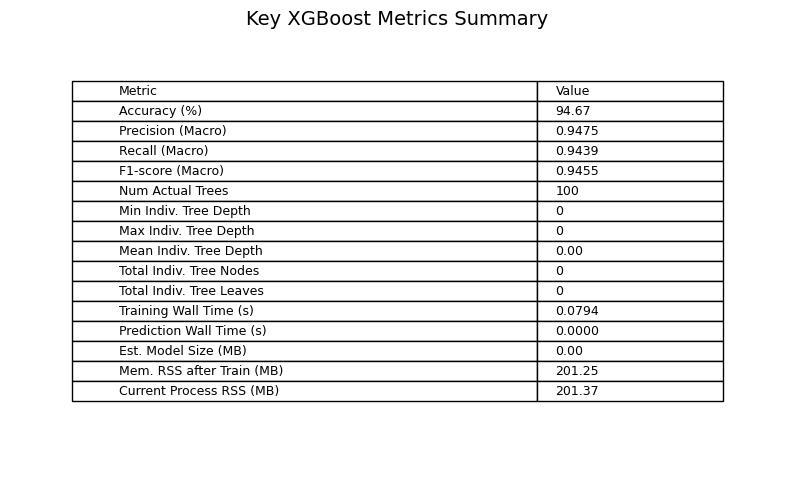


--- Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size
import json # For parsing XGBoost tree dump

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

# Attempt to import XGBoost
try:
    import xgboost as xgb
except ImportError:
    print("XGBoost library not found. Please install it: pip install xgboost")
    sys.exit()

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder # For encoding target variable
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- Helper function to parse XGBoost tree structure (JSON format) ---
def get_xgb_tree_node_properties_recursive(node_dict):
    """
    Recursively calculates max depth, node count, and leaf count for an XGBoost tree node.
    Args:
        node_dict (dict): A dictionary representing a node from XGBoost's JSON dump.
    Returns:
        tuple: (max_depth, node_count, leaf_count)
    """
    node_count = 1 # Count current node
    
    if 'leaf' in node_dict: # It's a leaf node
        return 1, 1, 1 # Depth of a leaf itself is 1, 1 node, 1 leaf

    # It's a split node
    max_child_depth = 0
    children_node_count = 0
    children_leaf_count = 0

    if 'children' in node_dict and node_dict['children']:
        for child_node in node_dict['children']:
            child_depth, child_nodes, child_leaves = get_xgb_tree_node_properties_recursive(child_node)
            max_child_depth = max(max_child_depth, child_depth)
            children_node_count += child_nodes
            children_leaf_count += child_leaves
            
    current_depth = 1 + max_child_depth
    node_count += children_node_count
    
    return current_depth, node_count, children_leaf_count


# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y_original = df.iloc[:, 0].values # Keep original y for reference and final reporting if needed

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]

# --- 1.5 Encode Target Variable ---
# XGBoost can handle string labels if use_label_encoder=False (default in newer versions)
# However, the user's script explicitly uses LabelEncoder for y_train.
# For consistency and to ensure learning_curve works as expected with the fitted model,
# we will encode y for training and for learning_curve.
le = LabelEncoder()
y = le.fit_transform(y_original) # Encode the full y array
class_names_original = le.classes_ # Original string class names for display

# --- 2. Split Data ---
# y is now encoded, so y_train and y_test will also be encoded.
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 3. Initialize Model ---
# Using XGBClassifier as requested
# Default n_estimators is 100. User script implies default or 100.
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss' if len(np.unique(y)) == 2 else 'mlogloss')
# Note: use_label_encoder=False is recommended with pre-encoded labels.
# eval_metric is set to avoid warnings with newer XGBoost versions.

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (XGBoost) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

xgb_classifier.fit(X_train, y_train_encoded) # Fit with encoded y_train

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else:
    all_metrics.update({'training_cpu_time_user': 0, 'training_cpu_time_system': 0, 'memory_rss_after_training_mb': 0})


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (XGBoost) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred_encoded = xgb_classifier.predict(X_test) # Predictions will be encoded

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else:
    all_metrics.update({'prediction_cpu_time_user': 0, 'prediction_cpu_time_system': 0})

# Inverse transform predictions and y_test_encoded to original labels for evaluation against user's expectations
y_pred_original = le.inverse_transform(y_pred_encoded)
y_test_original = le.inverse_transform(y_test_encoded)


# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (XGBoost) ---")
all_metrics['accuracy'] = accuracy_score(y_test_original, y_pred_original) * 100
all_metrics['precision_macro'] = precision_score(y_test_original, y_pred_original, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test_original, y_pred_original, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test_original, y_pred_original, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
# Use original labels for classification report if y_pred_original and y_test_original are available
print(classification_report(y_test_original, y_pred_original, zero_division=0, labels=le.classes_ if hasattr(le, 'classes_') else None, target_names=[str(c) for c in le.classes_] if hasattr(le, 'classes_') else None))


# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (XGBoost) ---")
all_metrics['n_features_in'] = xgb_classifier.n_features_in_
print(f"Number of Features Seen: {all_metrics['n_features_in']}")

if hasattr(xgb_classifier, 'get_booster'):
    booster = xgb_classifier.get_booster()
    all_metrics['n_actual_estimators'] = booster.num_boosted_rounds() # Or len(booster.get_dump(dump_format='json')))
    print(f"Number of Actual Estimators (Trees Built): {all_metrics['n_actual_estimators']}")

    tree_depths_xgb = []
    tree_node_counts_xgb = []
    tree_leaf_counts_xgb = []
    try:
        tree_dumps_json_str_list = booster.dump_model(dump_format='json')
        for tree_json_str in tree_dumps_json_str_list:
            tree_dict = json.loads(tree_json_str)
            depth, nodes, leaves = get_xgb_tree_node_properties_recursive(tree_dict)
            tree_depths_xgb.append(depth)
            tree_node_counts_xgb.append(nodes)
            tree_leaf_counts_xgb.append(leaves)
        
        if tree_depths_xgb:
            all_metrics['min_ind_tree_depth'] = np.min(tree_depths_xgb)
            all_metrics['max_ind_tree_depth'] = np.max(tree_depths_xgb)
            all_metrics['mean_ind_tree_depth'] = np.mean(tree_depths_xgb)
            print(f"Min Individual Tree Depth: {all_metrics['min_ind_tree_depth']}")
            print(f"Max Individual Tree Depth: {all_metrics['max_ind_tree_depth']}")
            print(f"Mean Individual Tree Depth: {all_metrics['mean_ind_tree_depth']:.2f}")

        if tree_node_counts_xgb:
            all_metrics['total_ind_tree_nodes'] = np.sum(tree_node_counts_xgb)
            all_metrics['mean_ind_nodes_per_tree'] = np.mean(tree_node_counts_xgb)
            print(f"Total Nodes across all Individual Trees: {all_metrics['total_ind_tree_nodes']}")
            print(f"Mean Nodes per Individual Tree: {all_metrics['mean_ind_nodes_per_tree']:.2f}")

        if tree_leaf_counts_xgb:
            all_metrics['total_ind_tree_leaves'] = np.sum(tree_leaf_counts_xgb)
            all_metrics['mean_ind_leaves_per_tree'] = np.mean(tree_leaf_counts_xgb)
            print(f"Total Leaves across all Individual Trees: {all_metrics['total_ind_tree_leaves']}")
            print(f"Mean Leaves per Individual Tree: {all_metrics['mean_ind_leaves_per_tree']:.2f}")

    except Exception as e:
        print(f"Could not parse XGBoost model dump for tree stats: {e}")
        keys_to_default_tree_stats = ['min_ind_tree_depth', 'max_ind_tree_depth', 'mean_ind_tree_depth',
                                  'total_ind_tree_nodes', 'mean_ind_nodes_per_tree',
                                  'total_ind_tree_leaves', 'mean_ind_leaves_per_tree']
        for key in keys_to_default_tree_stats: all_metrics[key] = all_metrics.get(key, 0) # Keep existing if any, else 0

else:
    all_metrics['n_actual_estimators'] = xgb_classifier.n_estimators # Fallback to parameter
    print("Booster object not available. Detailed tree stats cannot be extracted.")
    keys_to_default_tree_stats = ['min_ind_tree_depth', 'max_ind_tree_depth', 'mean_ind_tree_depth',
                                  'total_ind_tree_nodes', 'mean_ind_nodes_per_tree',
                                  'total_ind_tree_leaves', 'mean_ind_leaves_per_tree']
    for key in keys_to_default_tree_stats: all_metrics[key] = 0


# Estimating model size
model_size_bytes = sys.getsizeof(xgb_classifier)
if hasattr(xgb_classifier, 'get_booster'):
     model_size_bytes += sys.getsizeof(xgb_classifier.get_booster())
     # For a more accurate size, consider saving the model to disk and checking file size
     # booster.save_model('temp_xgb.model'); model_size_bytes = os.path.getsize('temp_xgb.model')

all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics.update({'current_process_rss_mb': 0, 'current_process_vms_mb': 0})

# --- 8. Visualizations (From User's Script and Adapted) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test_original) > 0 and len(y_pred_original) > 0:
        # Use original string labels for display
        disp = ConfusionMatrixDisplay(confusion_matrix(y_test_original, y_pred_original, labels=le.classes_),
                                      display_labels=[str(c) for c in le.classes_])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for XGB Classifier')
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    # Use the encoded 'y' for learning_curve as the model was trained on encoded labels
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y))) # y is already encoded here
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            # Create a new instance of XGBClassifier for learning curve to avoid issues with fitted model
            # and ensure it uses encoded labels correctly.
            lc_xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, 
                                                  eval_metric='logloss' if len(np.unique(y)) == 2 else 'mlogloss')

            train_sizes, train_scores, test_scores = learning_curve(
                lc_xgb_classifier, X, y, cv=n_splits_cv, # Pass encoded y
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5)
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for XGB Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation.")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# Feature Importances for XGBoost
print("\nDisplaying Feature Importances...")
if hasattr(xgb_classifier, 'feature_importances_'):
    importances = xgb_classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    all_metrics['feature_importances'] = importances

    plt.figure(figsize=(12, 7))
    plt.title("Feature Importances for XGB Classifier")
    plt.bar(range(X.shape[1]), importances[indices], color="darkorange", align="center")
    if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    else:
        plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this classifier.")
    all_metrics['feature_importances'] = []

# Histogram of Individual Tree Depths (if available)
print("\nDisplaying Histogram of Individual Tree Depths (XGB)...")
if 'tree_depths_xgb' in locals() and tree_depths_xgb and len(tree_depths_xgb) > 0:
    plt.figure(figsize=(10, 6))
    min_d, max_d = min(tree_depths_xgb), max(tree_depths_xgb)
    bins_hist = range(min_d, max_d + 2) if min_d != max_d else [min_d, min_d + 1]
    plt.hist(tree_depths_xgb, bins=bins_hist, align='left', rwidth=0.8, color='sandybrown')
    plt.title('Distribution of Individual Tree Depths in XGBoost')
    plt.xlabel('Maximum Depth of Individual Tree')
    plt.ylabel('Number of Trees')
    plt.xticks(range(min_d, max_d + 1) if min_d != max_d else [min_d])
    plt.grid(axis='y', alpha=0.75)
    plt.show()
elif all_metrics.get('min_ind_tree_depth') is not None:
    print("Individual tree depths data processed but list might be empty or not calculated if parsing failed.")
else:
    print("Skipping Histogram of Individual Tree Depths: No data available.")


# --- 9. New Visualizations for Collected Metrics (Adapted for XGBoost) ---
print("\n--- Generating Visualizations for Collected Metrics (XGBoost) ---")

# Plot 1: Performance Timings
fig_perf_xgb, ax_perf_xgb = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf_xgb.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf_xgb.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf_xgb.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf_xgb.set_xlabel('Operation')
ax_perf_xgb.set_ylabel('Time (seconds)')
ax_perf_xgb.set_title('XGBoost Performance Timings')
ax_perf_xgb.set_xticks(index)
ax_perf_xgb.set_xticklabels(time_categories)
ax_perf_xgb.legend()
for bar_group in [bar1, bar2, bar3]:
    for bar in bar_group:
        yval = bar.get_height()
        offset_factor = 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1)
        ax_perf_xgb.text(bar.get_x() + bar.get_width()/2.0, yval + offset_factor, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf_xgb.tight_layout()
plt.show()


# Plot 2: Model Complexity for XGBoost
fig_comp_xgb, ax_comp_xgb = plt.subplots(figsize=(12, 7))
complexity_metrics_names_xgb = [
    'Num Actual Trees', 'Min Indiv. Depth', 'Max Indiv. Depth',
    'Mean Indiv. Depth', 'Total Indiv. Nodes', 'Total Indiv. Leaves'
]
complexity_values_xgb = [
    all_metrics.get('n_actual_estimators', 0), all_metrics.get('min_ind_tree_depth', 0), all_metrics.get('max_ind_tree_depth', 0),
    all_metrics.get('mean_ind_tree_depth', 0), all_metrics.get('total_ind_tree_nodes', 0), all_metrics.get('total_ind_tree_leaves', 0)
]
colors_xgb = ['#FFB399', '#ADC2FF', '#99FFB3', '#FFD699', '#D4BFFF', '#FFB3CC']

bars_comp_xgb = ax_comp_xgb.bar(complexity_metrics_names_xgb, complexity_values_xgb, color=colors_xgb)
ax_comp_xgb.set_ylabel('Count / Depth / Value')
ax_comp_xgb.set_title('XGBoost Complexity Metrics')
ax_comp_xgb.tick_params(axis='x', rotation=30)
for bar in bars_comp_xgb:
    yval = bar.get_height()
    label_format = f'{int(yval)}' if yval == int(yval) and 'Mean' not in bar.get_label() else f'{yval:.2f}'
    if 'Mean Indiv. Depth' in bar.get_label(): label_format = f'{yval:.2f}'
    ax_comp_xgb.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * yval if yval >0 else 0.1 , label_format, ha='center', va='bottom')
fig_comp_xgb.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for XGBoost
fig_table_xgb, ax_table_xgb = plt.subplots(figsize=(10, 6))
ax_table_xgb.axis('tight')
ax_table_xgb.axis('off')

table_data_xgb = [
    ["Metric", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Num Actual Trees", f"{all_metrics.get('n_actual_estimators', 'N/A')}"],
    ["Min Indiv. Tree Depth", f"{all_metrics.get('min_ind_tree_depth', 'N/A')}"],
    ["Max Indiv. Tree Depth", f"{all_metrics.get('max_ind_tree_depth', 'N/A')}"],
    ["Mean Indiv. Tree Depth", f"{all_metrics.get('mean_ind_tree_depth', 0.0):.2f}"],
    ["Total Indiv. Tree Nodes", f"{all_metrics.get('total_ind_tree_nodes', 'N/A')}"],
    ["Total Indiv. Tree Leaves", f"{all_metrics.get('total_ind_tree_leaves', 'N/A')}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_xgb.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_xgb = ax_table_xgb.table(cellText=table_data_xgb, colLabels=None, cellLoc='left', loc='center', colWidths=[0.5, 0.2])
table_xgb.auto_set_font_size(False)
table_xgb.set_fontsize(9)
table_xgb.scale(1.2, 1.2)
ax_table_xgb.set_title('Key XGBoost Metrics Summary', fontsize=14, y=0.95)
plt.show()

print("\n--- Analysis Complete ---")
